**PIA IA VERANO 2022**

realizado por:

Alfredo Lopez Aguirre 1992104

Maria Magdely Presas Huerta 1921175

Daniela Priscila Delgadillo Esquivel 1909350

***INTRODUCCION***

En este proyecto se genero un conjunto de datos para posteriormente cargarlo a una red neuronal combulucional para predecir el tipo de numero 

Primero cargamos todas las librerias que utilizaremos:

In [42]:

#Actividad PIA IA VERANO 2022
import cv2
import matplotlib.pyplot as plt
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.datasets import mnist
from matplotlib import pyplot

inicializamos dos variables de tipo arreglo para posteriormente guardar las imagenes que cargaremos al programa

In [43]:
img_array=[]
img_resized=[]

Posteriormente usamos FOR para cargar las imagenes a arreglos independientes para cada numero diferente, se suben desde el directorio mostrado y se aprovecha para etiquetar todas las imagenes con su respectiva etiqueta, posteriormente se guardan todas las imagenes y etiquetas en sus respectivos arreglos

In [44]:
array0=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/0/0*")]
label0=["0" for file in array0]
array1=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/1/1**")]
label1=["1" for file in array1]
array2=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/2/2*")]
label2=["2" for file in array2]
array3=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/3/3*")]
label3=["3" for file in array3]
array4=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/4/4*")]
label4=["4" for file in array4]
array5=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/5/5*")]
label5=["5" for file in array5]
array6=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/6/6*")]
label6=["6" for file in array6]
array7=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/7/7*")]
label7=["7" for file in array7]
array8=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/8/8*")]
label8=["8" for file in array8]
array9=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/9/9*")]
label9=["9" for file in array9]
img_array=array0+array1+array2+array3+array4+array5+array6+array7+array8+array9
print(len(img_array))
label_array=label0+label1+label2+label3+label4+label5+label6+label7+label8+label9
print(len(label_array))

300
300


revisamos la longitud de los datos en las variables y posteriormente revisamos que se hayan cargado correctamente las imagenes:

In [45]:
len(img_resized)

0

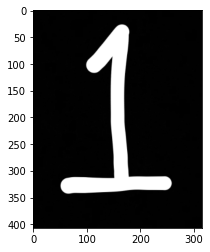

In [46]:
plt.imshow(img_array[50], cmap='gray')

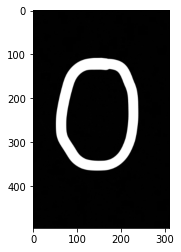

In [47]:
plt.imshow(img_array[23], cmap='gray')

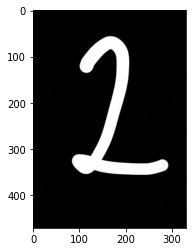

In [48]:
plt.imshow(img_array[87], cmap='gray')


utilizamos este algoritmo para imprimir todas las imagenes en el rango de 0 a 9, en este caso seran todos los ceros, unicamente para comprobar que se cargaron correctamente las imagenes.

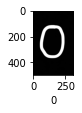

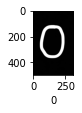

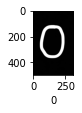

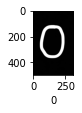

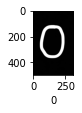

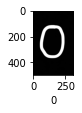

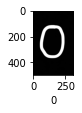

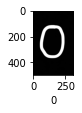

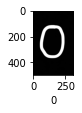

In [49]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(img_array[i],cmap=plt.get_cmap('gray'))
  plt.xlabel(label_array[i])
  plt.show()

posteriormente, se procede a reescalar las imagenes a 28 x 28 pixeles, ya que este es el formato que acepta la red neuronal y revisamos que la longitud del nuevo arreglo donde se guardaran las imagenes sea el correcto.

In [50]:
img_resized=[cv2.resize(file, (28,28), interpolation=cv2.INTER_LINEAR)for file in img_array]
len(img_resized)

300

de igual manera, usamos el mismo algoritmo utilizado antes para visualizar que las imagenes se hayan reescalado y guardado correctamente.

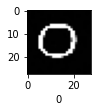

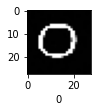

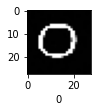

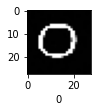

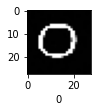

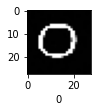

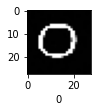

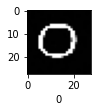

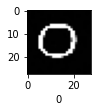

In [51]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(img_resized[i],cmap=plt.get_cmap('gray'))
  plt.xlabel(label_array[i])
  plt.show()

A continuacion, separamos las imagenes y etiquetas en 80% para entrenamiento y 20% para validacion, convertimos los arreglos a arreglos de numpy y usamos labelencoder para las etiquetas, para que la red neuronal pueda reconocer los datos

In [52]:
train_images=[]
train_labels=[]
test_images=[]
test_labels=[]

In [53]:
#modificar tamaño del indice de acuerdo al numero de imagenes
i=0
j=0
for i in range(0,len(img_resized),30):
  for j in range(24):
    train_images.append (img_resized[i+j])
    train_labels.append(label_array[i+j])     
    
  for j in range(6):
    test_images.append(img_resized[i+24+j])
    test_labels.append(label_array[i+24+j])

#convertir a float
train_images=np.array(train_images)
train_labels=np.array(train_labels)
test_images=np.array(test_images)
test_labels=np.array(test_labels)

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
test_labels=label.fit_transform(test_labels)
train_labels=label.fit_transform(train_labels)

normalizamos las imagenes y posteriormente usamos .shape y len para ver que las caracteristicas sean las deseadas

In [54]:
train_images=train_images/255.0
test_images=test_images/255.0

(240, 28, 28)
(60, 28, 28)
60
240
AxesImage(54,36;334.8x217.44)
Text(0.5, 0, '1')


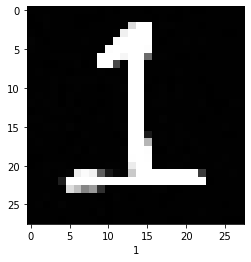

In [55]:
print(train_images.shape)
print(test_images.shape)
print(len(test_labels))
print(len(train_labels))
print(plt.imshow(test_images[10],cmap='gray'))
print(plt.xlabel(test_labels[10]))

Estructura y entrenamiento de Red Neuronal Artificial Convolusional (RNAC)

En esta sección se establece la cantidad de capas de convolusión y capas de aprendizaje para nuestra red neuronal artificial convolusional.

In [56]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [57]:
# Parte de clasificación
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [58]:
# Compliación del modelo: características
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 1s 53ms/step - loss: 2.1589 - accuracy: 0.4167 - val_loss: 1.8346 - val_accuracy: 0.7000
Epoch 2/10
8/8 [==============================] - 0s 32ms/step - loss: 1.4980 - accuracy: 0.8042 - val_loss: 0.9113 - val_accuracy: 0.9000
Epoch 3/10
8/8 [==============================] - 0s 31ms/step - loss: 0.5488 - accuracy: 0.9333 - val_loss: 0.1683 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 0s 32ms/step - loss: 0.0687 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 0s 33ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 0s 34ms/step - loss: 7.5327e-04 - accuracy: 1.0000 - val_loss: 3.5283e-04 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 0s 33ms/step - loss: 2.3702e-04 - accuracy: 1.0000 - val_loss: 1.3764e-04 - val_accuracy: 1.0000
Epoch 8/10
8/8 [======

:Resultados de exactitud de la RNAC

en la grafica podemos apreciar el como cambia conforme avanzan las epocas de entrenamiento la presicion del programa tanto la presicion de su validacion, esto determina el porcentaje de precicion de el programa

2/2 - 0s - loss: 6.2618e-05 - accuracy: 1.0000 - 27ms/epoch - 13ms/step
1.0


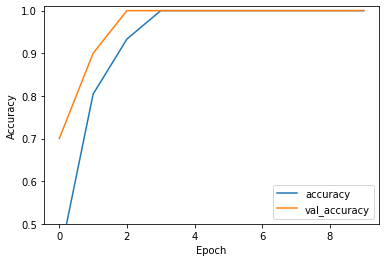

In [62]:
#test accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

Se muestran al menos 3 predicciones de dígitos del 0 al 9. apreciamos que el programa acerto el 100% de las predicciones realizadas

In [63]:
#predicciones
predictions = model.predict(test_images)
print(predictions[1])
print(np.argmax(predictions[1]))
print(test_labels[1])

[9.99994040e-01 1.61772748e-10 3.67555799e-06 8.71960548e-09
 2.12189857e-08 1.07573350e-09 2.26804423e-06 3.36057271e-09
 1.18225625e-08 2.66507238e-09]
0
0


In [64]:
print(predictions[10])
print(np.argmax(predictions[10]))
print(test_labels[10])

[6.2268690e-11 9.9988830e-01 1.1169206e-04 7.5804456e-09 4.4968448e-13
 3.6171710e-09 2.4064312e-10 3.0919305e-09 2.6646991e-09 1.1750590e-08]
1
1


In [65]:
print(predictions[3])
print(np.argmax(predictions[3]))
print(test_labels[3])

[9.99994040e-01 1.61772748e-10 3.67555799e-06 8.71960548e-09
 2.12189857e-08 1.07573350e-09 2.26804423e-06 3.36057271e-09
 1.18225625e-08 2.66507238e-09]
0
0
